In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import GridSimulator
HeatSimulation = GridSimulator.ClassHeatSimulation()

In [2]:
NumberNodes = 8
HeatSimulation.SetSize(.005,.025)
HeatSimulation.SetNodes(NumberNodes,.10)
HeatSimulation.SetMaterialProperties(7753,486,36)
HeatSimulation.SetConvectionProperties(4,25)
HeatSimulation.EnableSurfaceHeatTransfer(True)
HeatSimulation.SetHeatSource(200)
HeatSimulation.SetInitalTemp(25)

In [3]:
HeatSimulation.SetTimeIncrement(1)
HeatSimulation.SuggestedTimeInc(True)

5.0

In [4]:
def Logic(TempArray,Type):
    if Type == "BangBang":
        if (TempArray[NumberNodes + 1] > 135 + 5):
            HeatSimulation.TempLeftEnd = 25;
        elif (TempArray[NumberNodes + 1] <= 135 - 5):
            HeatSimulation.TempLeftEnd = 200;

In [5]:
Duration = 3600
StepNumber = 0
TargetTemp = 45
HeatSimulation.TempLeftEnd = 200
HeatSimulation.SetHeatSource(200)
TEMPS = HeatSimulation.Temps
while StepNumber < Duration:
    Inc = 10
    StepNumber = StepNumber + Inc
    HeatSimulation.SetInitalTempProfile(TEMPS)
    HeatSimulation.GetTempatureAtNodeAtTime(StepNumber-Inc,StepNumber,4)
    TEMPS = HeatSimulation.Temps
    Logic(TEMPS,"BangBang")

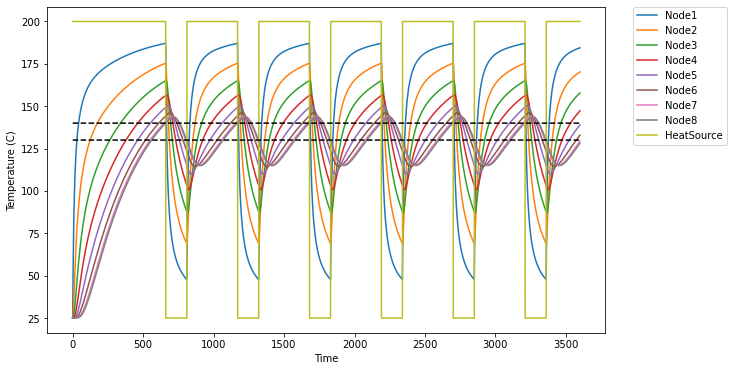

In [8]:
dfValidate4 = HeatSimulation.AllTemp
plt.rcParams["figure.figsize"] = (10,6)
plt.figure()
plt.plot(dfValidate4.Time, dfValidate4.Node1, label="Node1")
plt.plot(dfValidate4.Time, dfValidate4.Node2, label="Node2")
plt.plot(dfValidate4.Time, dfValidate4.Node3, label="Node3")
plt.plot(dfValidate4.Time, dfValidate4.Node4, label="Node4")
plt.plot(dfValidate4.Time, dfValidate4.Node5, label="Node5")
plt.plot(dfValidate4.Time, dfValidate4.Node6, label="Node6")
plt.plot(dfValidate4.Time, dfValidate4.Node7, label="Node7")
plt.plot(dfValidate4.Time, dfValidate4.Node8, label="Node8")
plt.plot(dfValidate4.Time, dfValidate4.Heater, label="HeatSource")
#plt.plot(dfValidate4.Time, np.ones(np.shape(dfValidate4.Time))*40, label="Fluid")
plt.plot(dfValidate4.Time, 130*np.ones(dfValidate4.Time.shape), "--k")
plt.plot(dfValidate4.Time, 140*np.ones(dfValidate4.Time.shape), "--k")
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

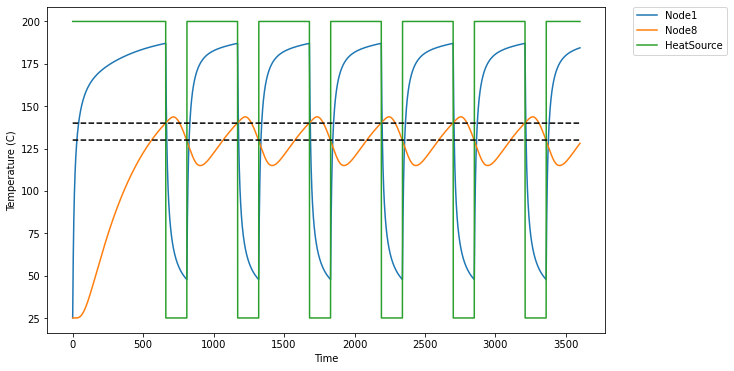

In [9]:
dfValidate4 = HeatSimulation.AllTemp
plt.figure()
plt.plot(dfValidate4.Time, dfValidate4.Node1, label="Node1")
#plt.plot(dfValidate4.Time, dfValidate4.Node2, label="Node2")
#plt.plot(dfValidate4.Time, dfValidate4.Node3, label="Node3")
plt.plot(dfValidate4.Time, dfValidate4.Node8, label="Node8")
plt.plot(dfValidate4.Time, dfValidate4.Heater, label="HeatSource")
#plt.plot(dfValidate4.Time, np.ones(np.shape(dfValidate4.Time))*40, label="Fluid")
plt.plot(dfValidate4.Time, 130*np.ones(dfValidate4.Time.shape), "--k")
plt.plot(dfValidate4.Time, 140*np.ones(dfValidate4.Time.shape), "--k")
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.rcParams["figure.figsize"] = (10,6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()